# Cleaning. Version 2

Parsing, cleaning, creating DFs

In [1]:
%run load.ipynb
import pandas as pd
import configlib as lib

In [2]:
v2 = lib.get_v2()
v3 = lib.get_v3()
spark = lib.get_spark_interfax()

## Cleaning Major Tables

#### V3 Major DF

In [3]:
print("Count total NaN at each column in a DataFrame: \n", v3.isnull().sum())

Count total NaN at each column in a DataFrame: 
 Unnamed: 0    0
Company       0
Action        0
Industry      0
Country       0
tone          0
dtype: int64


In [4]:
v3.shape

(3344, 6)

In [5]:
v3 = v3.drop('Unnamed: 0', axis = 1)
v3 = v3.rename(columns = {'tone': 'Tone'})
v3 = v3.sort_values(by='Company')
v3 = v3.reset_index(drop=True)

v3.head(1)

,Company,Action,Industry,Country,Tone
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,2


In [6]:
# Define a dictionary to map the numbers to their corresponding labels
label_mapping = {0: 'leaved', 1: 'continue', 2: 'paused'}

# Replace the numbers in the specified column with the labels
v3['Tone'] = v3['Tone'].map(label_mapping)

v3.head(10)

,Company,Action,Industry,Country,Tone
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,paused
1,1Password,"['suspend', 'new', 'investments/development']",Consumer Discretionary,France,paused
2,1xBet,"['ending', 'new', 'investments', 'where', 'has...",Financials,Netherlands,leaved
3,3HC Semiconductors,"['some', 'clients', 'no', 'longer', 'supplied'...",Materials,France,leaved
4,3M,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",Industrials,Netherlands,continue
5,3M Company,"['suspend', 'new', 'investments', 'and', 'new'...",Health Care,Switzerland,paused
6,A&D,"['cease', 'trading', 'operations', 'with', 'ru...",Industrials,Germany,leaved
7,A-SAFE,"['still', 'operating', 'in', 'russia', ';', 's...",Information Technology,Australia,leaved
8,AAK,"['suspended', 'some', 'shipments']",Information Technology,Japan,leaved
9,AB InBev,"['continues', 'flows', 'to', 'russian', 'and',...",Industrials,France,leaved


#### V2 Major DF

In [7]:
v2 = v2.rename(columns={'i': 'Company'})
v2 = v2.rename(columns={'ИНН': 'INT'})
v2 = v2.sort_values(by='Company')
v2 = v2.reset_index(drop=True)

v2.head(1)

,Company,Action,Industry,Country,INT
0,1840 & Company,"suspend aesthetics operations, pause new clini...",Health Care,United States,7743855873


#### Creating Merged DF

Merge the two datasets based on the "Company" column

In [8]:
merged = pd.merge(v3, v2, on='Company')

merged.head(1)

,Company,Action_x,Industry_x,Country_x,Tone,Action_y,Industry_y,Country_y,INT
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,paused,"suspend aesthetics operations, pause new clini...",Health Care,United States,7743855873


Select the desired columns

In [9]:
desired_columns = ['Company', 'Action_x', 'Industry_x', 'Country_x', 'Tone', 'INT']
merged = merged[desired_columns]

merged.head(1)

,Company,Action_x,Industry_x,Country_x,Tone,INT
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,paused,7743855873


Rename the columns

In [10]:
merged.columns = ['Company', 'Action', 'Industry', 'Country', 'Tone', 'INT']

merged.head(1)

,Company,Action,Industry,Country,Tone,INT
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,paused,7743855873


## Cleaning Component Tables (C-Tables)

#### Spark Interfax DF

In [11]:
spark.head()

,№,Наименование,Регистрационный номер,Наименование на английском,Краткое наименование,Дата регистрации,"Возраст компании, лет",Код налогоплательщика,Вид деятельности/отрасль,Организационно-правовая форма,...,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,1,"3М ВОЛГА, ООО",1.121674e+12,"3M VOLGA, OOO","ООО""3М ВОЛГА""",16.08.2012,"10,5",1646033450,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,...,13 300 000,104 722 000,218 916 000,19 484 000,153 458 000,-154 449 000,-147 371 000,-135 529 000,-196 685 000,-172 832 000
1,2,"CCC, ООО",1.198617e+12,"OOO C, CJSC","ООО ""CCC""",18.06.2019,"3,5",8608060872,Строительство инженерных коммуникаций для водо...,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,65 126 000,47 022 000,NaN,NaN,-381 000,8 130 000,213 000
2,3,"WIX-SZ, ООО",1.133538e+12,"WIX-SZ, OOO","ООО ""WIX-SZ""",12.02.2013,"10,0",3526030067,"Работы строительные специализированные прочие,...",Общества с ограниченной ответственностью,...,18 049 000,11 592 000,5 157 000,11 399 000,15 481 000,558 000,548 000,279 000,422 000,543 000
3,4,"А.С. ГРУПП, ООО",1.192375e+12,"A.S. GROUP, LLC","ООО ""А.С. ГРУПП""",16.04.2019,"4,0",2310213891,Консультирование по вопросам коммерческой деят...,Общества с ограниченной ответственностью,...,NaN,NaN,1 586 000,5 833 000,NaN,NaN,NaN,-2 667 000,-914 000,NaN
4,5,"АББ, ООО",1.027739e+12,"ABB, OOO","ООО ""АББ""",13.12.2000,"22,0",7727180430,Торговля оптовая производственным электротехни...,Общества с ограниченной ответственностью,...,21 012 268 000,23 143 045 000,22 362 311 000,23 544 957 000,23 339 744 000,1 908 551 000,1 011 902 000,1 142 817 000,-33 797 000,1 555 765 000


In [12]:
spark.shape

(796, 28)

In [13]:
columns_to_drop = ['№', 'Наименование', 'Регистрационный номер', 'Краткое наименование', 'Дата регистрации']
spark = spark.drop(columns_to_drop, axis=1)

print(spark.columns)

Index(['Наименование на английском', 'Возраст компании, лет',
       'Код налогоплательщика', 'Вид деятельности/отрасль',
       'Организационно-правовая форма', 'Форма собственности',
       'Размер компании', '2017, Среднесписочная численность работников',
       '2018, Среднесписочная численность работников',
       '2019, Среднесписочная численность работников',
       '2020, Среднесписочная численность работников',
       '2021, Среднесписочная численность работников', 'Мои списки',
       '2017, Выручка, RUB', '2018, Выручка, RUB', '2019, Выручка, RUB',
       '2020, Выручка, RUB', '2021, Выручка, RUB',
       '2017, Прибыль (убыток) до налогообложения , RUB',
       '2018, Прибыль (убыток) до налогообложения , RUB',
       '2019, Прибыль (убыток) до налогообложения , RUB',
       '2020, Прибыль (убыток) до налогообложения , RUB',
       '2021, Прибыль (убыток) до налогообложения , RUB'],
      dtype='object')


Rename columns 'Наименование на английском' and 'Код налогоплательщика' to 'Company' and 'INT'

In [14]:
spark = spark.rename(columns={"Наименование на английском": "Company"})
spark = spark.rename(columns={"Код налогоплательщика": "INT"})
# spark['Company'] = spark['Company'].str.lower()

spark.head(1)

,Company,"Возраст компании, лет",INT,Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников",...,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"3M VOLGA, OOO","10,5",1646033450,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,4,8,7,...,13 300 000,104 722 000,218 916 000,19 484 000,153 458 000,-154 449 000,-147 371 000,-135 529 000,-196 685 000,-172 832 000


## Creating Main Working DF (Majors + C-Tables)

In [15]:
df = merged.merge(spark, on='INT')

df.head(10)

,Company_x,Action,Industry,Country,Tone,INT,Company_y,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,...,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,paused,7743855873,"EBBVI, OOO","10,5",Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,...,10 254 588 000,9 951 071 000,10 208 217 000,11 038 418 000,10 107 069 000,39 767 000,115 612 000,-98 477 000,436 625 000,492 786 000
1,3HC Semiconductors,"['some', 'clients', 'no', 'longer', 'supplied'...",Materials,France,leaved,3528103017,"ALS, AO","17,5",Производство промышленных газов,Непубличные акционерные общества,...,4 241 597 000,4 085 493 000,4 219 756 000,4 261 008 000,3 935 799 000,1 758 438 000,1 923 752 000,2 082 180 000,2 148 197 000,2 038 560 000
2,3M,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",Industrials,Netherlands,continue,9704116463,"AIRBUS, LLC","1,0",Деятельность туристических агентств,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAK,"['suspended', 'some', 'shipments']",Information Technology,Japan,leaved,7714391842,"FUDZHIFILM RUS, OOO","29,0",Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,...,3 178 782 000,3 672 729 000,2 898 280 000,2 800 149 000,3 410 160 000,117 504 000,49 294 000,188 041 000,265 433 000,446 284 000
4,ABC,"['no', 'new', 'business', 'in', 'russia']",Consumer Discretionary,Austria,leaved,9715417769,"HERZ GROUP RUS, LLC","0,5",Торговля оптовая водопроводным и отопительным ...,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ABC News,"['suspend', 'new', 'investments', 'in', 'russia']",Industrials,United States,paused,7728053385,"UPDK-KHAINS, OOO","31,0",Управление недвижимым имуществом за вознагражд...,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,NaN,NaN,-27 000,-657 000,-473 000,-115 000,-83 000
6,ACCA,"['suspend', 'new', 'investment', 'in', 'russia']",Industrials,France,paused,7725704127,"ID LOGISTIKS RUS, OOO","12,5",Деятельность по складированию и хранению,Общества с ограниченной ответственностью,...,1 230 715 000,1 627 697 000,2 572 849 000,2 239 789 000,2 639 568 000,80 349 000,-79 454 000,-168 129 000,65 183 000,140 244 000
7,ADAMA,"['no', 'further', 'investments/clinical', 'tri...",Health Care,United States,leaved,7701620453,"MERCK LIFE SCIENCE, LLC","17,5",Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,...,502 171 000,780 527 000,831 842 000,1 349 847 000,1 831 439 000,102 374 000,91 240 000,54 501 000,306 309 000,346 203 000
8,ADM,"['pause', 'all', 'new', 'capital', 'investment...",Health Care,Switzerland,leaved,7705772224,"NOVARTIS FARMA, OOO","16,0",Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,...,18 184 446 000,21 894 506 000,28 138 077 000,31 854 990 000,39 722 228 000,-46 362 000,991 082 000,161 520 000,88 970 000,559 463 000
9,ADP,"['no', 'new', 'russian', 'investments', ';', '...",Energy,Austria,leaved,7728139307,"OMV, OOO","26,5",Деятельность по финансовой аренде (лизингу/суб...,Общества с ограниченной ответственностью,...,4 295 000,3 292 000,5 660 000,7 350 000,7 103 000,-58 000,-3 088 000,845 000,2 063 000,1 690 000


In [16]:
df = df.rename(columns={"Company_y": "Company"})

df = df.drop({'Company_x', 'INT',
                            '2017, Среднесписочная численность работников',
                            '2018, Среднесписочная численность работников',
                            '2019, Среднесписочная численность работников',
                            '2020, Среднесписочная численность работников',
                            '2021, Среднесписочная численность работников',
                            'Мои списки'}, axis=1)

df = df[['Company', 'Industry', 'Country', 'Action', 'Tone', 'Возраст компании, лет',
                       'Вид деятельности/отрасль', 'Организационно-правовая форма',
                       'Форма собственности', 'Размер компании', '2017, Выручка, RUB',
                       '2018, Выручка, RUB', '2019, Выручка, RUB', '2020, Выручка, RUB',
                       '2021, Выручка, RUB', '2017, Прибыль (убыток) до налогообложения , RUB',
                       '2018, Прибыль (убыток) до налогообложения , RUB',
                       '2019, Прибыль (убыток) до налогообложения , RUB',
                       '2020, Прибыль (убыток) до налогообложения , RUB',
                       '2021, Прибыль (убыток) до налогообложения , RUB']]

df.head(10)

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"EBBVI, OOO",Health Care,United States,"['suspend', 'aesthetics', 'operations', ',', '...",paused,"10,5",Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,10 254 588 000,9 951 071 000,10 208 217 000,11 038 418 000,10 107 069 000,39 767 000,115 612 000,-98 477 000,436 625 000,492 786 000
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",leaved,"17,5",Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4 241 597 000,4 085 493 000,4 219 756 000,4 261 008 000,3 935 799 000,1 758 438 000,1 923 752 000,2 082 180 000,2 148 197 000,2 038 560 000
2,"AIRBUS, LLC",Industrials,Netherlands,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",continue,"1,0",Деятельность туристических агентств,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"FUDZHIFILM RUS, OOO",Information Technology,Japan,"['suspended', 'some', 'shipments']",leaved,"29,0",Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3 178 782 000,3 672 729 000,2 898 280 000,2 800 149 000,3 410 160 000,117 504 000,49 294 000,188 041 000,265 433 000,446 284 000
4,"HERZ GROUP RUS, LLC",Consumer Discretionary,Austria,"['no', 'new', 'business', 'in', 'russia']",leaved,"0,5",Торговля оптовая водопроводным и отопительным ...,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"UPDK-KHAINS, OOO",Industrials,United States,"['suspend', 'new', 'investments', 'in', 'russia']",paused,"31,0",Управление недвижимым имуществом за вознагражд...,Общества с ограниченной ответственностью,Федеральная собственность,NaN,NaN,NaN,NaN,NaN,NaN,-27 000,-657 000,-473 000,-115 000,-83 000
6,"ID LOGISTIKS RUS, OOO",Industrials,France,"['suspend', 'new', 'investment', 'in', 'russia']",paused,"12,5",Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1 230 715 000,1 627 697 000,2 572 849 000,2 239 789 000,2 639 568 000,80 349 000,-79 454 000,-168 129 000,65 183 000,140 244 000
7,"MERCK LIFE SCIENCE, LLC",Health Care,United States,"['no', 'further', 'investments/clinical', 'tri...",leaved,"17,5",Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Средние предприятия,502 171 000,780 527 000,831 842 000,1 349 847 000,1 831 439 000,102 374 000,91 240 000,54 501 000,306 309 000,346 203 000
8,"NOVARTIS FARMA, OOO",Health Care,Switzerland,"['pause', 'all', 'new', 'capital', 'investment...",leaved,"16,0",Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,18 184 446 000,21 894 506 000,28 138 077 000,31 854 990 000,39 722 228 000,-46 362 000,991 082 000,161 520 000,88 970 000,559 463 000
9,"OMV, OOO",Energy,Austria,"['no', 'new', 'russian', 'investments', ';', '...",leaved,"26,5",Деятельность по финансовой аренде (лизингу/суб...,Общества с ограниченной ответственностью,Частная собственность,Микропредприятия,4 295 000,3 292 000,5 660 000,7 350 000,7 103 000,-58 000,-3 088 000,845 000,2 063 000,1 690 000


In [17]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

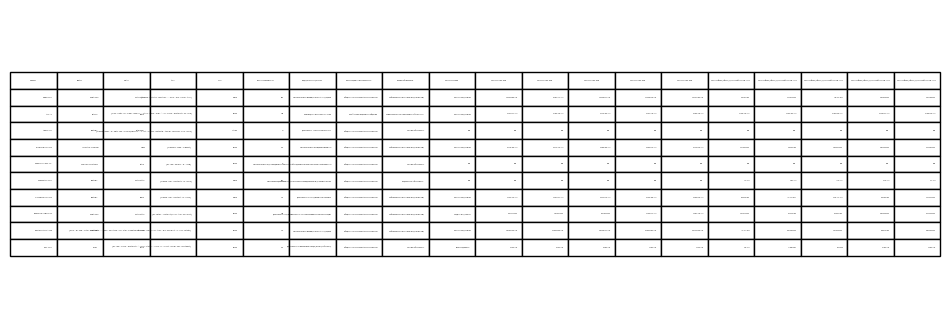

In [18]:
fig, ax =plt.subplots(figsize=(12,4))
# ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.head(10).values,colLabels=df.head(10).columns,loc='center')

pp = PdfPages("../docs/graphics/df.pdf")
pp.savefig(fig, bbox_inches=None)
pp.close()

The column 'Возраст компании, лет' is of string datatype. To make it float datatype, we replace , with .

In [19]:
if df['Возраст компании, лет'].dtype == object:
    # Replace commas with periods in the column
    df['Возраст компании, лет'] = df['Возраст компании, лет'].str.replace(',', '.')
df['Возраст компании, лет'] = df['Возраст компании, лет'].astype(float)

Some columns have big number with spaces, therefore they are of a string type.  To make them float datatype, we delete all unnecassary spaces

In [20]:
df['2017, Выручка, RUB'] = df['2017, Выручка, RUB'].str.replace(' ', '').astype(float)
df['2018, Выручка, RUB'] = df['2018, Выручка, RUB'].str.replace(' ', '').astype(float)
df['2019, Выручка, RUB'] = df['2019, Выручка, RUB'].str.replace(' ', '').astype(float)
df['2020, Выручка, RUB'] = df['2020, Выручка, RUB'].str.replace(' ', '').astype(float)
df['2021, Выручка, RUB'] = df['2021, Выручка, RUB'].str.replace(' ', '').astype(float)
df['2017, Прибыль (убыток) до налогообложения , RUB'] = df['2017, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
df['2018, Прибыль (убыток) до налогообложения , RUB'] = df['2018, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
df['2019, Прибыль (убыток) до налогообложения , RUB'] = df['2019, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
df['2020, Прибыль (убыток) до налогообложения , RUB'] = df['2020, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
df['2021, Прибыль (убыток) до налогообложения , RUB'] = df['2021, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)

df.head(10)

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"EBBVI, OOO",Health Care,United States,"['suspend', 'aesthetics', 'operations', ',', '...",paused,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.025459e+10,9.951071e+09,1.020822e+10,1.103842e+10,1.010707e+10,3.976700e+07,1.156120e+08,-9.847700e+07,4.366250e+08,4.927860e+08
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",leaved,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4.241597e+09,4.085493e+09,4.219756e+09,4.261008e+09,3.935799e+09,1.758438e+09,1.923752e+09,2.082180e+09,2.148197e+09,2.038560e+09
2,"AIRBUS, LLC",Industrials,Netherlands,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",continue,1.0,Деятельность туристических агентств,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"FUDZHIFILM RUS, OOO",Information Technology,Japan,"['suspended', 'some', 'shipments']",leaved,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.178782e+09,3.672729e+09,2.898280e+09,2.800149e+09,3.410160e+09,1.175040e+08,4.929400e+07,1.880410e+08,2.654330e+08,4.462840e+08
4,"HERZ GROUP RUS, LLC",Consumer Discretionary,Austria,"['no', 'new', 'business', 'in', 'russia']",leaved,0.5,Торговля оптовая водопроводным и отопительным ...,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"UPDK-KHAINS, OOO",Industrials,United States,"['suspend', 'new', 'investments', 'in', 'russia']",paused,31.0,Управление недвижимым имуществом за вознагражд...,Общества с ограниченной ответственностью,Федеральная собственность,NaN,NaN,NaN,NaN,NaN,NaN,-2.700000e+04,-6.570000e+05,-4.730000e+05,-1.150000e+05,-8.300000e+04
6,"ID LOGISTIKS RUS, OOO",Industrials,France,"['suspend', 'new', 'investment', 'in', 'russia']",paused,12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.230715e+09,1.627697e+09,2.572849e+09,2.239789e+09,2.639568e+09,8.034900e+07,-7.945400e+07,-1.681290e+08,6.518300e+07,1.402440e+08
7,"MERCK LIFE SCIENCE, LLC",Health Care,United States,"['no', 'further', 'investments/clinical', 'tri...",leaved,17.5,Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Средние предприятия,5.021710e+08,7.805270e+08,8.318420e+08,1.349847e+09,1.831439e+09,1.023740e+08,9.124000e+07,5.450100e+07,3.063090e+08,3.462030e+08
8,"NOVARTIS FARMA, OOO",Health Care,Switzerland,"['pause', 'all', 'new', 'capital', 'investment...",leaved,16.0,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.818445e+10,2.189451e+10,2.813808e+10,3.185499e+10,3.972223e+10,-4.636200e+07,9.910820e+08,1.615200e+08,8.897000e+07,5.594630e+08
9,"OMV, OOO",Energy,Austria,"['no', 'new', 'russian', 'investments', ';', '...",leaved,26.5,Деятельность по финансовой аренде (лизингу/суб...,Общества с ограниченной ответственностью,Частная собственность,Микропредприятия,4.295000e+06,3.292000e+06,5.660000e+06,7.350000e+06,7.103000e+06,-5.800000e+04,-3.088000e+06,8.450000e+05,2.063000e+06,1.690000e+06


In [21]:
df.shape

(476, 20)

## Handling missing values in DF

Count total NaN at each column in a database

In [22]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                                              0
Industry                                             0
Country                                              0
Action                                               0
Tone                                                 0
Возраст компании, лет                                0
Вид деятельности/отрасль                             0
Организационно-правовая форма                        0
Форма собственности                                  0
Размер компании                                     77
2017, Выручка, RUB                                 123
2018, Выручка, RUB                                 111
2019, Выручка, RUB                                 104
2020, Выручка, RUB                                 100
2021, Выручка, RUB                                 106
2017, Прибыль (убыток) до налогообложения , RUB    110
2018, Прибыль (убыток) до налогообложения , RUB    103
2019, Прибыл

Visualize missing values in dataset

<Axes: >

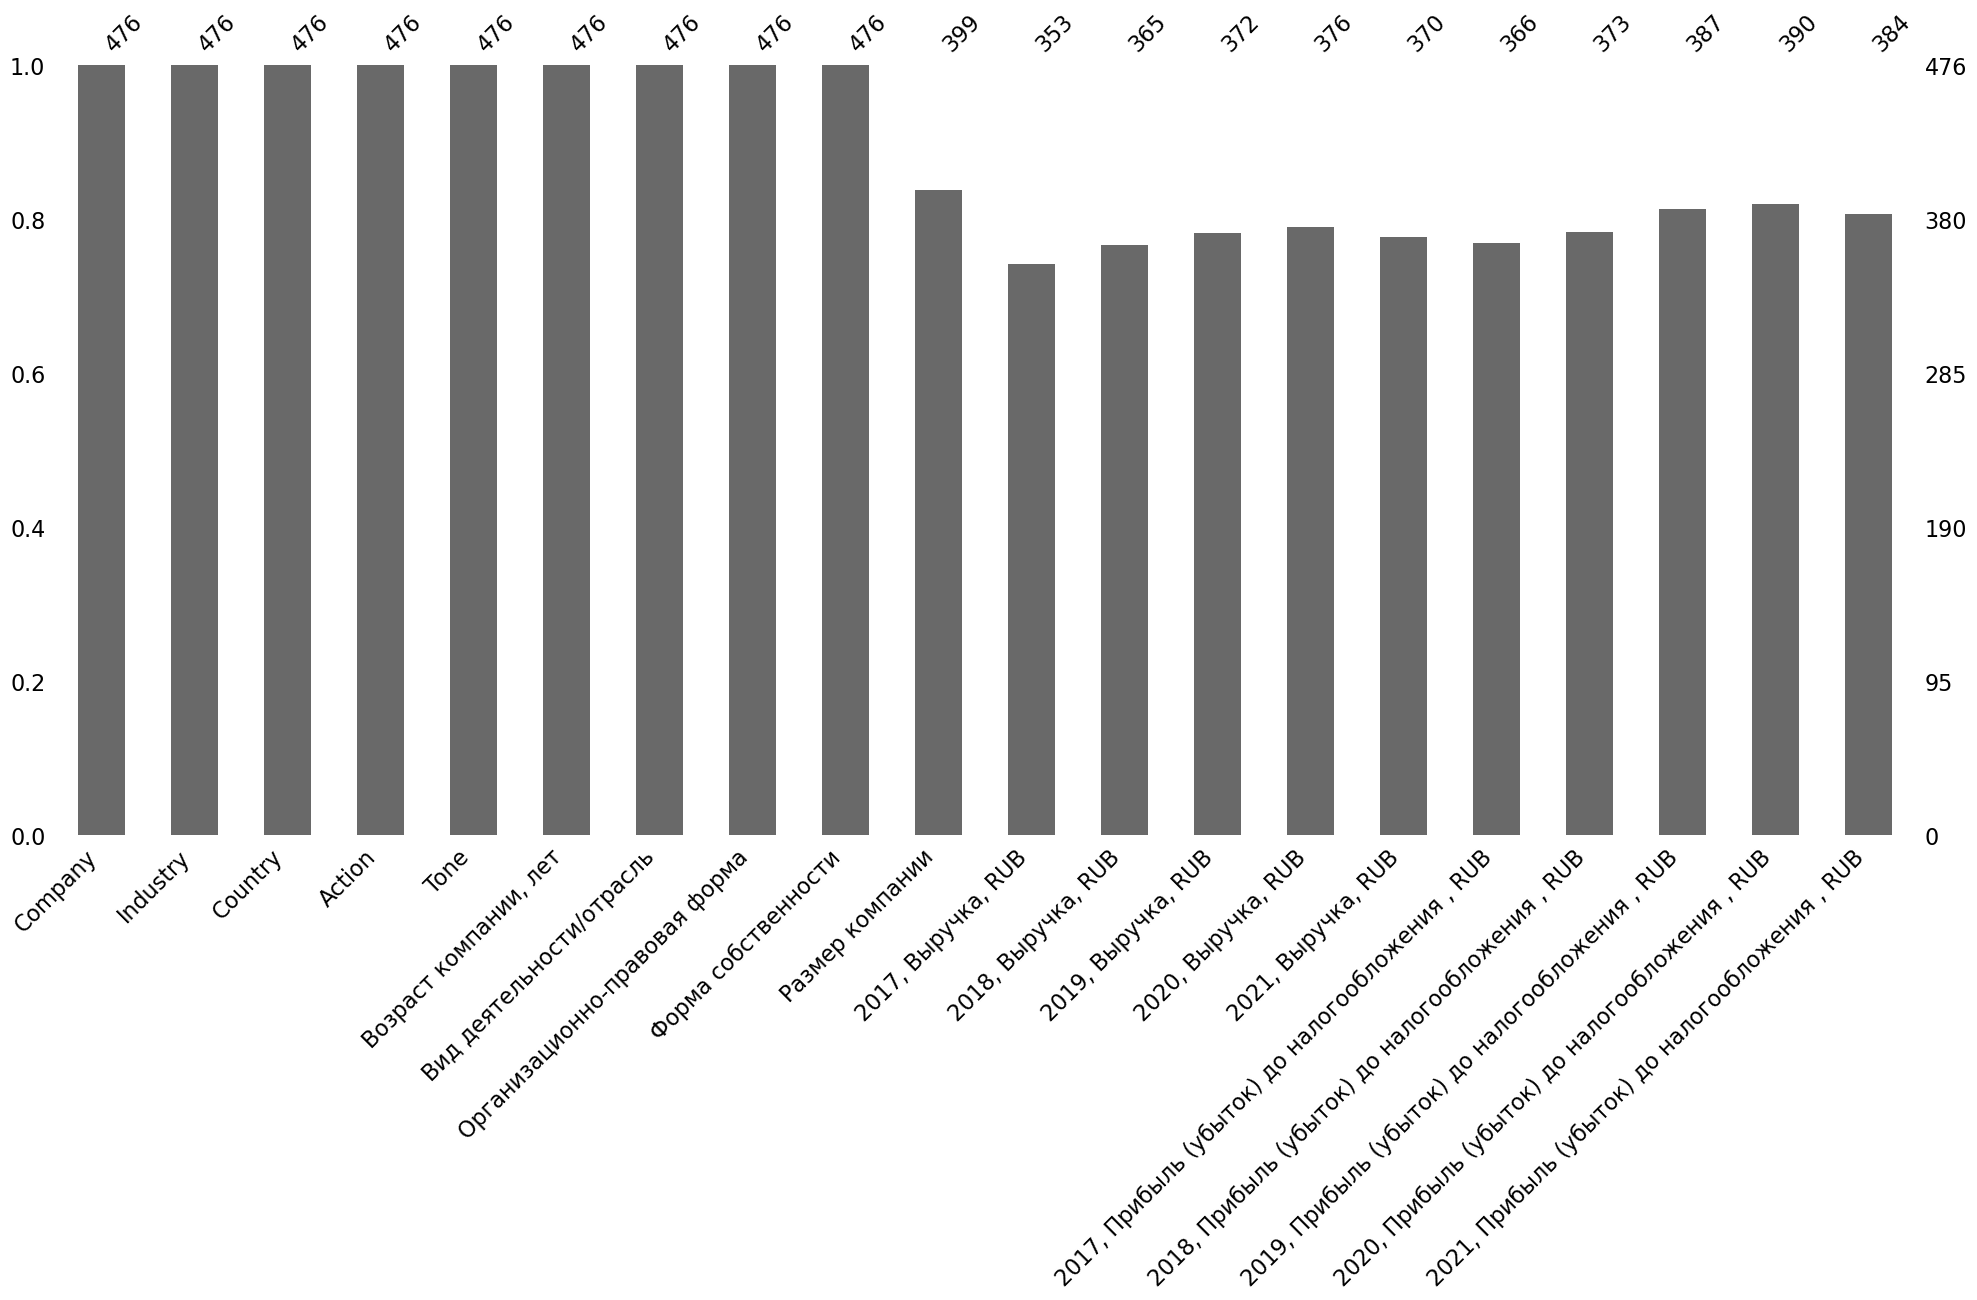

In [23]:
import missingno as msno
msno.bar(df)

<Axes: >

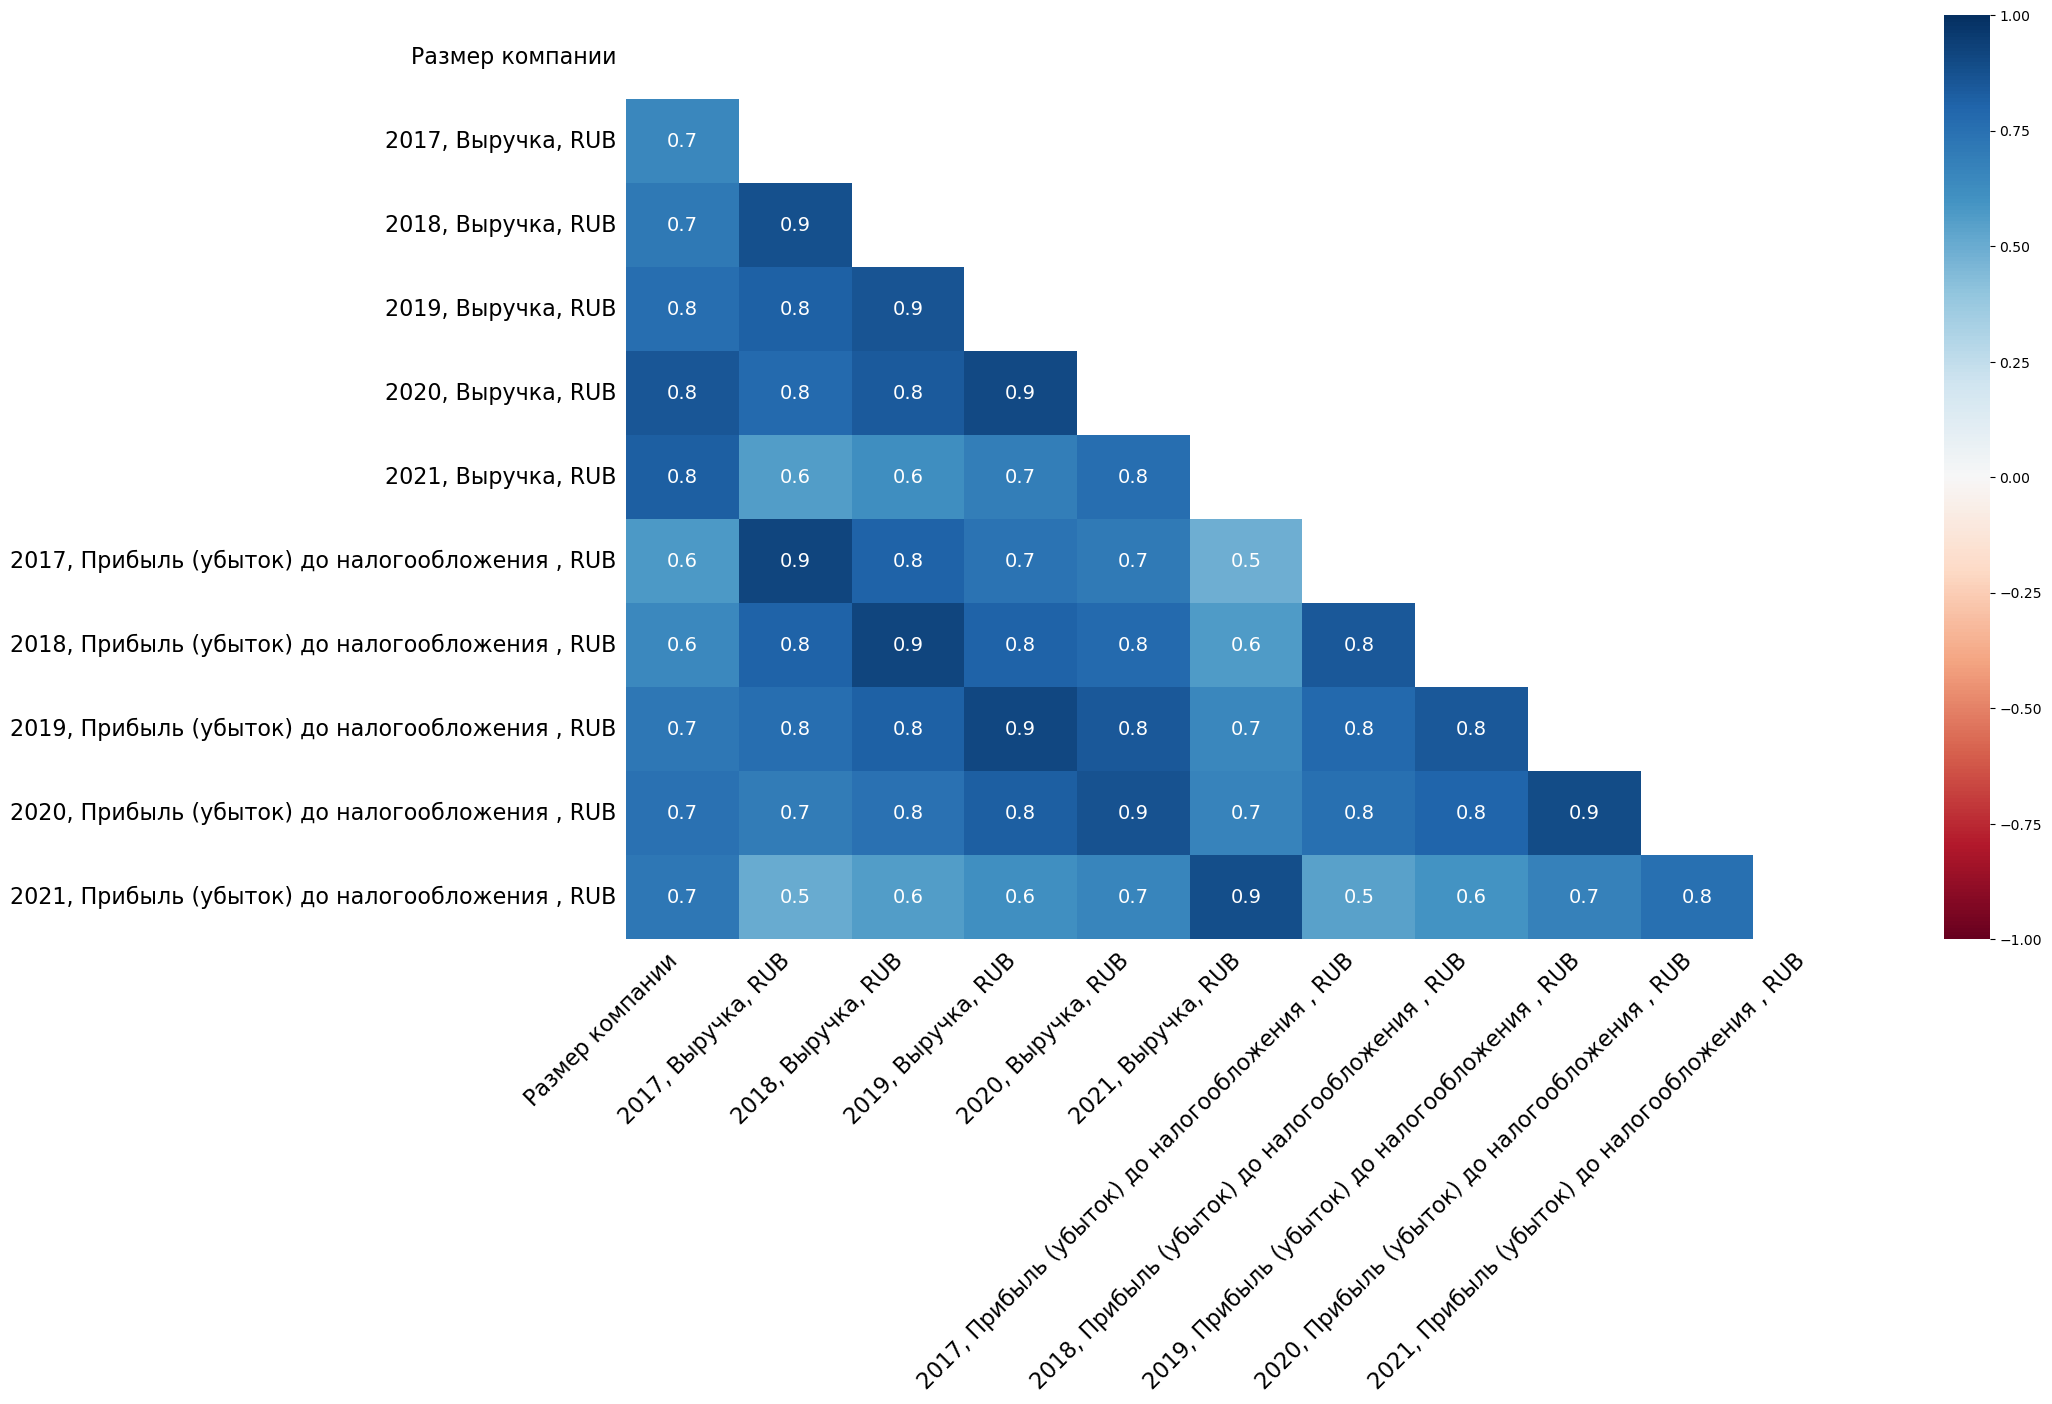

In [24]:
msno.heatmap(df)

Filling NaN profit values with its mean. Delete all rows where more than 6 NaN values exist.

In [25]:
df.dropna(thresh=df.shape[1] - 6, inplace=True)
print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())
df.shape

 
Count total NaN at each column in a DataFrame : 

 Company                                             0
Industry                                            0
Country                                             0
Action                                              0
Tone                                                0
Возраст компании, лет                               0
Вид деятельности/отрасль                            0
Организационно-правовая форма                       0
Форма собственности                                 0
Размер компании                                    10
2017, Выручка, RUB                                 38
2018, Выручка, RUB                                 26
2019, Выручка, RUB                                 18
2020, Выручка, RUB                                 14
2021, Выручка, RUB                                 34
2017, Прибыль (убыток) до налогообложения , RUB    30
2018, Прибыль (убыток) до налогообложения , RUB    20
2019, Прибыль (убыток) до нал

(389, 20)

Delete all rows where Nan values exist.

In [26]:
df['Mean Revenue'] = df[['2017, Выручка, RUB', '2018, Выручка, RUB', '2019, Выручка, RUB', '2020, Выручка, RUB', '2021, Выручка, RUB']].mean(axis=1)
df.dropna(subset=['Mean Revenue'], inplace=True)
df.drop(['2017, Выручка, RUB', '2018, Выручка, RUB', '2019, Выручка, RUB', '2020, Выручка, RUB', '2021, Выручка, RUB'], axis=1, inplace=True)

In [27]:
df.head()

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB",Mean Revenue
0,"EBBVI, OOO",Health Care,United States,"['suspend', 'aesthetics', 'operations', ',', '...",paused,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.976700e+07,1.156120e+08,-9.847700e+07,4.366250e+08,4.927860e+08,1.031187e+10
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",leaved,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,1.758438e+09,1.923752e+09,2.082180e+09,2.148197e+09,2.038560e+09,4.148731e+09
3,"FUDZHIFILM RUS, OOO",Information Technology,Japan,"['suspended', 'some', 'shipments']",leaved,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.175040e+08,4.929400e+07,1.880410e+08,2.654330e+08,4.462840e+08,3.192020e+09
6,"ID LOGISTIKS RUS, OOO",Industrials,France,"['suspend', 'new', 'investment', 'in', 'russia']",paused,12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,8.034900e+07,-7.945400e+07,-1.681290e+08,6.518300e+07,1.402440e+08,2.062124e+09
7,"MERCK LIFE SCIENCE, LLC",Health Care,United States,"['no', 'further', 'investments/clinical', 'tri...",leaved,17.5,Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Средние предприятия,1.023740e+08,9.124000e+07,5.450100e+07,3.063090e+08,3.462030e+08,1.059165e+09


In [28]:
df.shape

(383, 16)

In [29]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                                             0
Industry                                            0
Country                                             0
Action                                              0
Tone                                                0
Возраст компании, лет                               0
Вид деятельности/отрасль                            0
Организационно-правовая форма                       0
Форма собственности                                 0
Размер компании                                     5
2017, Прибыль (убыток) до налогообложения , RUB    30
2018, Прибыль (убыток) до налогообложения , RUB    20
2019, Прибыль (убыток) до налогообложения , RUB     5
2020, Прибыль (убыток) до налогообложения , RUB     6
2021, Прибыль (убыток) до налогообложения , RUB    25
Mean Revenue                                        0
dtype: int64


In [30]:
df['Mean Profit'] = df[['2017, Прибыль (убыток) до налогообложения , RUB', '2018, Прибыль (убыток) до налогообложения , RUB', '2019, Прибыль (убыток) до налогообложения , RUB', '2020, Прибыль (убыток) до налогообложения , RUB', '2021, Прибыль (убыток) до налогообложения , RUB']].mean(axis=1)
df.dropna(subset=['Mean Revenue'], inplace=True)
df.drop(['2017, Прибыль (убыток) до налогообложения , RUB', '2018, Прибыль (убыток) до налогообложения , RUB', '2019, Прибыль (убыток) до налогообложения , RUB', '2020, Прибыль (убыток) до налогообложения , RUB', '2021, Прибыль (убыток) до налогообложения , RUB'], axis=1, inplace=True)

In [31]:
df.head()

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,Mean Revenue,Mean Profit
0,"EBBVI, OOO",Health Care,United States,"['suspend', 'aesthetics', 'operations', ',', '...",paused,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.031187e+10,1.972626e+08
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",leaved,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4.148731e+09,1.990225e+09
3,"FUDZHIFILM RUS, OOO",Information Technology,Japan,"['suspended', 'some', 'shipments']",leaved,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.192020e+09,2.133112e+08
6,"ID LOGISTIKS RUS, OOO",Industrials,France,"['suspend', 'new', 'investment', 'in', 'russia']",paused,12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.062124e+09,7.638600e+06
7,"MERCK LIFE SCIENCE, LLC",Health Care,United States,"['no', 'further', 'investments/clinical', 'tri...",leaved,17.5,Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Средние предприятия,1.059165e+09,1.801254e+08


In [32]:
df.shape

(383, 12)

In [33]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                          0
Industry                         0
Country                          0
Action                           0
Tone                             0
Возраст компании, лет            0
Вид деятельности/отрасль         0
Организационно-правовая форма    0
Форма собственности              0
Размер компании                  5
Mean Revenue                     0
Mean Profit                      0
dtype: int64


In [34]:
df.dropna(inplace=True)
print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                          0
Industry                         0
Country                          0
Action                           0
Tone                             0
Возраст компании, лет            0
Вид деятельности/отрасль         0
Организационно-правовая форма    0
Форма собственности              0
Размер компании                  0
Mean Revenue                     0
Mean Profit                      0
dtype: int64


In [35]:
lib.save_new_df('cleaning-v2', df)

The file with cleaning-v2.pkl has already exists!
Please, provide different file_name.


In [36]:
df.shape

(378, 12)

In [37]:
df.describe()

,"Возраст компании, лет",Mean Revenue,Mean Profit
count,378.000000,3.780000e+02,3.780000e+02
mean,16.914021,1.651074e+10,1.203219e+09
std,7.018251,5.812312e+10,4.409037e+09
min,3.000000,1.535000e+05,-8.422013e+09
25%,12.000000,1.501430e+08,1.341688e+06
50%,16.500000,1.895347e+09,7.999430e+07
75%,21.000000,8.277844e+09,5.357462e+08
max,46.000000,8.470387e+11,3.872745e+10


In [38]:
df.corr()

C:\Users\ilyas\AppData\Local\Temp\ipykernel_2564\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,"Возраст компании, лет",Mean Revenue,Mean Profit
"Возраст компании, лет",1.000000,0.222106,0.196005
Mean Revenue,0.222106,1.000000,0.533225
Mean Profit,0.196005,0.533225,1.000000


Now our dataset has no NaN values, and we can start clusterization!